### Sanity checks:

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp, gc
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *
gc.enable()

In [2]:
gc.collect();

In [3]:
T = 100
I = 5    # number of locations
J = 5    # number of species
K = 3    # number of latent factors

In [4]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [5]:
n_particles = 1000
alpha_grad, lmbda_grad, c_grad, phi_grad, logsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax=T, Imax=I, Jmax=J, Kmax=K, rep=500)

In [15]:
np.round(np.mean(alpha_grad,0),2)

array([[-15.2 ,  -2.3 ,  13.9 ,   1.63,  -5.12],
       [-14.03,  -4.9 ,  15.98,   0.94,  -7.05]])

In [7]:
np.round(np.var(alpha_grad,0),1)

array([[ 2.8,  4.7,  4.9,  5.4,  5.6],
       [17.3, 30.4, 31.8, 33.2, 35.4]])

In [8]:
np.round(np.var(alpha_grad,0)[1]/np.var(alpha_grad,0)[0],1)

array([6.2, 6.5, 6.5, 6.2, 6.3])

In [16]:
np.round(np.mean(lmbda_grad,0),2)

array([[[-4.89,  6.86, -2.59],
        [-1.23, -6.49,  3.17],
        [ 6.89, -4.43,  5.31],
        [ 0.47,  3.17,  1.63],
        [-1.12,  2.72,  4.25]],

       [[-7.82,  6.59, -5.54],
        [-3.44, -8.26, -2.8 ],
        [ 5.33,  0.72,  6.42],
        [-1.85, -2.66,  0.93],
        [ 1.63,  0.34, -0.65]]])

In [10]:
np.round(np.var(lmbda_grad,0),1)

array([[[ 8. , 12. , 15. ],
        [ 7.8, 10.6, 10.8],
        [ 8.2,  7. , 12. ],
        [ 6.9,  7.4, 11.4],
        [ 5.1, 10.8,  9.5]],

       [[47.8, 67.9, 76.7],
        [44. , 66.1, 65.9],
        [51. , 52.2, 70.6],
        [42.7, 45.1, 68.3],
        [26.5, 63.6, 56.2]]])

In [11]:
np.round(np.var(lmbda_grad,0)[1]/np.var(lmbda_grad,0)[0],1)

array([[5.9, 5.7, 5.1],
       [5.6, 6.2, 6.1],
       [6.2, 7.4, 5.9],
       [6.1, 6.1, 6. ],
       [5.2, 5.9, 5.9]])

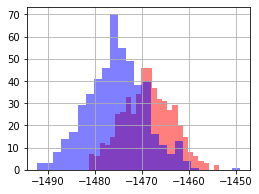

In [12]:
fig = plt.rcParams['figure.figsize'] = (4, 3)
plt.hist(logNC[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logNC[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True);

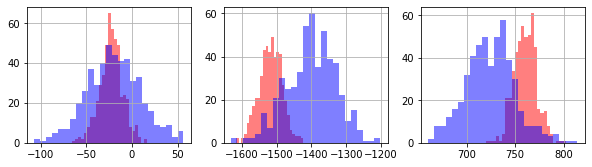

In [13]:
fig = plt.rcParams['figure.figsize'] = (10, 2.5)
plt.subplot(131)
plt.hist(c_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(c_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(132)
plt.hist(phi_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(phi_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(133)
plt.hist(logsigmasq_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logsigmasq_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)

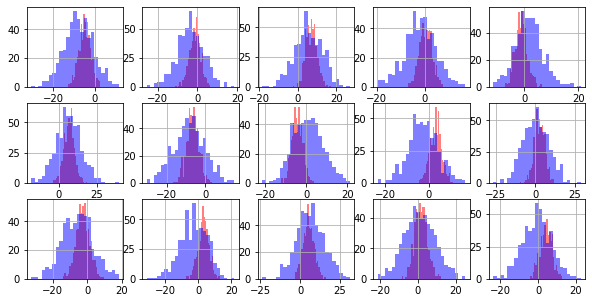

In [14]:
fig = plt.rcParams['figure.figsize'] = (10, 5)
for k in range(K) :
    for j in range(J) :
        idx = k*J + j + 1
        plt.subplot(K,J,idx)
        plt.hist(lmbda_grad[:,0,j,k], bins=25, alpha=0.5, color="red")
        plt.hist(lmbda_grad[:,1,j,k], bins=25, alpha=0.5, color="blue")
        plt.grid(True)